In [1]:
import os
import glob
import unicodedata
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltp
import numpy as np
import requests
from sklearn.linear_model import LinearRegression
import json
import random
import xml.etree.ElementTree as et
from bs4 import BeautifulSoup

In [2]:
def vector_add(a,b) :
  a_dim = len(a.columns)
  b_dim = len(b.columns)
  if a_dim != b_dim :
    print("Size mismatch")
  else : 
    c = a + b
    print(c)

x1 = pd.DataFrame([[1,4,2,3], [6,1,0,4]])
x2 = pd.DataFrame([[7,9,4,6], [4,6,3,9]])


vector_add(x1,x2)

    0   1  2   3
0   8  13  6   9
1  10   7  3  13


In [3]:
def vector_prob(a,b) :
  a_dim = len(a.columns)
  b_dim = len(b.index)
  if a_dim != b_dim :
    print("Size mismatch")
  else :
    c = np.matmul(a,b)
    print(c)

x1 = pd.DataFrame([[1,4,2,3],
                   [6,1,0,4]])
x2 = pd.DataFrame([[7,9],
                   [4,6],
                   [4,6],
                   [3,9]])

x3 = pd.DataFrame([[7,9],
                   [4,6],
                   [4,6],
                   [3,9]])

vector_prob(x1,x2)


    0   1
0  40  72
1  58  96


C:\Users\Owner\AppData\Local\Temp\ipykernel_8056\3726080511.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  c = np.matmul(a,b)


In [9]:
import pandas as pd
import numpy as np
import requests

def lu_decomp(mat) :
   rows, cols = np.shape(mat)
   if rows < cols :
     s = rows
     l = cols
   else :
     s = cols
     l = rows
   for k in range(0,s) :
     x = 1.0 / mat[k,k]
     for i in range(k+1,rows) :
       mat[i,k] = mat[i,k] * x
     for i in range(k+1,rows) :
        for j in range(k+1,cols) :
          mat[i,j] = mat[i,j] - mat[i,k] * mat[k,j]
   return(mat)



def fst_equ(ma, y) :
  row, col = np.shape(ma)
  mat_1 = lu_decomp(ma)
  z = []
  x = []
  if (row != col)|(row != len(y)) :
    print("Inapproporiate type marrix")
  else : 
    mat_2 = np.zeros((row, col))
    mat_3 = np.zeros((row, col))

    for i in range(row) :
      mat_2[i,i] = 1
      for j in range(i,col) :
        mat_3[i,j] = mat_1[i,j]

    for i in range(1,row) :
      for j in range(i) :
        mat_2[i,j] = mat_1[i,j]
        
    #z value
    z.append(y[0])
    for i in range(1,row) :
      a = y[i]
      for j in range(i) :
        a -= z[i-1]*mat_2[i,j]
      z.append(a)

    x.append(z[0]/mat_3[row-1,col-1])

    for i in range(1,row) :
      b = z[row-1-i]
      for j in range(i) :
        b += -x[j]*mat_3[row-1-i,col-j-1]
        b = b/mat_3[row-i-1,col-i-1]
      x.append(b)
    return(x)



sam_mat = np.array([[1,6,3,4],
                    [3,6,9,1],
                    [2,7,5,2],
                    [2,3,8,1]])
sam_y = np.array([2,7,1,9])

fst_equ(sam_mat, sam_y)

[-0.10526315789473684,
 1.631578947368421,
 -0.0010964912280701758,
 -2.4671052631578942]

Calculation Function to execute LU

In [13]:
def fibo() :
    h1 = 1
    fibo_seq = []
    howmuch = int(input("Enter the Number : "))
    for i in range(howmuch) :
        fibo_seq.append(h1)
        if i == 0 :
            h1 = h1
        else : h1 += fibo_seq[i-1]
    return(fibo_seq)

fibo()

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [38]:
a = np.ones((3,3))
b = np.zeros((3,2))
c = np.arange(10,160,10)
c = np.reshape(c, (3,5))

d = np.c_[a,b]
e = np.r_[d,c]

f = np.tile(e, (2,1))
f

x = np.vstack([range(7)[i:i + 3] for i in range(5)])
x

a = np.array([[  1,    2,    3,    4],
              [ 46,   99,  100,   71],
              [ 81,   59,   90,  100]])
ranking = np.argsort(a[1,:])
a[:, ranking]

np.random.randint(0,2,10)
np.mean(np.random.randint(1,7,100))
10000*(1+(1/100)*np.random.randn(100))

a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)
print(index, count)

['a' 'b' 'c'] [2 2 1]


Above thing is just a practice for treating matrix

In [23]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],
          index=["Seoul", "Busan", "Incheon", "Daegu"])
s.name = "Population"
s.index.name = "City"

s2 = pd.Series({"Seoul": 9631482, "Busan": 3393191,
                "Incheon": 2632035, "Daegu": 1490158}, 
                index = ["Incheon", "Busan", "Seoul", "Daegu"])

s2["Daejeon"] = 1490158

del s2["Daegu"]

data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "Region": ["Capital", "Gyeongsang", "Capital", "Gyeongsang"],
    "2010-2015 Increase Rate": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["Region", "2015", "2010", "2005", "2000", "2010-2015 Increase Rate"]
index = ["Seoul", "Busan", "Incheon", "Daegu"]
df_test = pd.DataFrame(data, index=index, columns=columns)

df_test.index.name = "City"
df_test.columns.name = "Characters"
df_test


Characters,지역,2015,2010,2005,2000,2010-2015 증가율
City,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [16]:
ages = [0,2,10,21,23,37, 31, 61, 20, 41, 32, 101]
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)

df = pd.DataFrame(ages, columns=["ages"])
df["age_cat"] = pd.cut(df.ages, bins, labels = labels)

np.random.seed(0)
df2 = pd.DataFrame({'key1': ['A', 'A', 'B', 'B', 'A'],
                    'key2': ['one', 'two', 'one', 'two', 'one'],
                    'data1': [1, 2, 3, 4, 5],
                    'data2': [10, 20, 30, 40, 50]})

groups = df2.groupby(df2.key1)['data1'].sum()
groups2 = df2.data1.groupby([df2.key1, df2.key2]).sum()

import seaborn as sns

iris = sns.load_dataset("iris")

def peak_to_peak_ratio(x):
    return x.max() / x.min()

iris.groupby(iris.species).agg(peak_to_peak_ratio)

def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3]

iris.groupby(iris.species).apply(top3_petal_length)

iris.groupby(iris.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


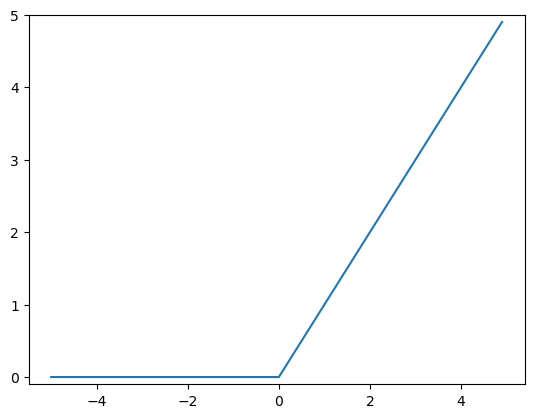

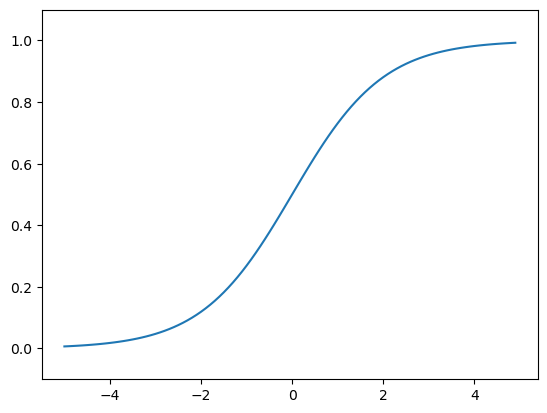

C:\Users\Owner\AppData\Local\Temp\ipykernel_496\3341462628.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0 , dtype = np.int)


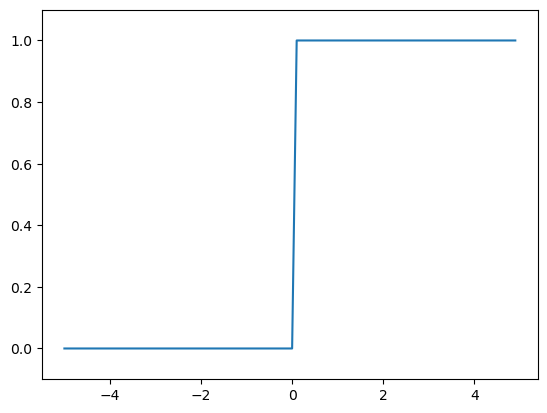

In [11]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab as plt2
import numpy as np

def AND(x1,x2) :
    b = -0.7
    if ((x1!=1)&(x1!=0))|((x2!=1)&(x2!=0)) :
        print("invalid input")
    else :
        w = np.array([0.5, 0.5])
        x = np.array([x1,x2])
        std = np.sum(w*x) + b
        if std > 0 :
            return(1)
        else : return(0)

def OR(x1,x2) :
    b = -0.2
    if ((x1!=1)&(x1!=0))|((x2!=1)&(x2!=0)) :
        print("invalid input")
    else :
        w = np.array([0.5, 0.5])
        x = np.array([x1,x2])
        std = np.sum(w*x) + b
        if std > 0 :
            return(1)
        else : return(0)

def NAND(x1,x2) :
    b = -0.7
    if ((x1!=1)&(x1!=0))|((x2!=1)&(x2!=0)) :
        print("invalid input")
    else :
        w = np.array([0.5, 0.5])
        x = np.array([x1,x2])
        std = -(np.sum(w*x) + b)
        if std > 0 :
            return(1)
        else : return(0)

def XOR(x1, x2) :
    a = NAND(x1, x2)
    b = OR(x1,x2)
    c = AND(a,b)
    return c

def step_function(x) :
    return np.array(x > 0 , dtype = np.int)

def sigmoid(x) : 
    return 1/(1+np.exp(-x))

def relu(x) : 
    return np.maximum(0,x)

x1 = np.arange(-5.0, 5.0, 0.1)

plt2.plot(x1,relu(x1))
plt2.ylim(-0.1, 5.0)
plt2.show()

plt2.plot(x1,sigmoid(x1))
plt2.ylim(-0.1, 1.1)
plt2.show()

plt2.plot(x1,step_function(x1))
plt2.ylim(-0.1, 1.1)
plt2.show()

In [18]:
def st_fr(X) :
    W1 = np.array([[0.1, 0.3, 0.6],
                   [0.4, 0.1, 0.6]])
    B1 = np.array([0.3,0.6,0.1])
    if len(X) != 2 :
        return print("Incorrect data set")
    else : 
        A1 = np.dot(X, W1) + B1
        Y1 = sigmoid(A1)
    W2 = np.array([[0.1, 0.3],
                   [0.4, 0.1],
                   [0.9, 0.2]])
    B2 = np.array([0.3,0.6])
    A2 = np.dot(Y1, W2) + B2
    Y2 = relu(A2)
    W3 = np.array([[0.8, 0.9],
                   [0.3, 0.2]])
    B3 = np.array([0.3,-0.4])
    A3 = np.dot(Y2, W3) + B3
    Y3 = sigmoid(A3)
    return Y2

test_x = np.array([2,5])
st_fr(test_x)

array([1.61857985, 1.15911864])

In [19]:
def soft_max(a) :
    exa = np.exp(a)
    y = exa / sum(exa)
    return y


array([0.61288635, 0.38711365])